In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy.stats import kendalltau
from pylab import rcParams
import pymysql
import numpy as np
import pandas as pd

%matplotlib inline

In [34]:
def call_mysql():
    con = False
    rows = np.nan
    try:
        con = pymysql.connect(host='localhost', port=3307, user='root', passwd='', db='ortho')
        with con:
            cur = con.cursor()
            #myvalues = "'" + yelp_id+"'," + str(stars) + "," + str(reviews) + "," + "1"
            sql = 'USE ortho;'
            cur.execute(sql)
            sql = 'SELECT stars,nreviews FROM business;' 
            #print(sql)
            cur.execute(sql)
            rows = cur.fetchall()
#             for row in rows:
#                 print(row)
    except pymysql.Error, e:
        print "Error %d: %s" % (e.args[0],e.args[1])
        sys.exit(1)
    finally:
        if con:
            con.close()
    return rows     

In [35]:
def seaborn_graph(array):
    print('My first graph\n')
    sns.set(style="ticks")
    
    x = array[:,0]
    y = np.log(array[:,1])
    
    fig = sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#008A00")
    #ax = plt.axes()
    
    fig.set_axis_labels('Stars','Reviews (log)', fontsize=30)
    #plt.set_xticklabels([np.array(1,5,.5)])
    #plt.set_xticklabels(np.array(1,5,.5))
    #plt.setp([ax.get_xticklabels()], fontsize=12)
    plt.show()

In [71]:
def scatterplot_graph(array):
    
    x = array[:,0]
    y = np.log(array[:,1])
    
#     print 'shapes: ',np.shape(x), np.shape(y)
#     print 'types: ',len(x), len(y)
#     print np.shape(x[:]), np.shape(y[:])
    
    width = [min(x),np.ceil(max(x))]
    
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    fig = plt.plot(x, y, marker='d', ms=8, mew=.5,lw=0)
    
    plt.setp([ax.set_ylabel('Reviews (log)'),ax.set_xlabel('Stars')],fontsize=16)
    
    # Calculate and plot a regression line for each group
#     regr = linear_model.LinearRegression(fit_intercept=True, normalize=True,copy_X=True)
#     regr.fit(x,y,1)
#     plt.plot(width, regr.predict(width), color = c, lw=1)
    
    
    ax.margins(0.05)
    

My first graph



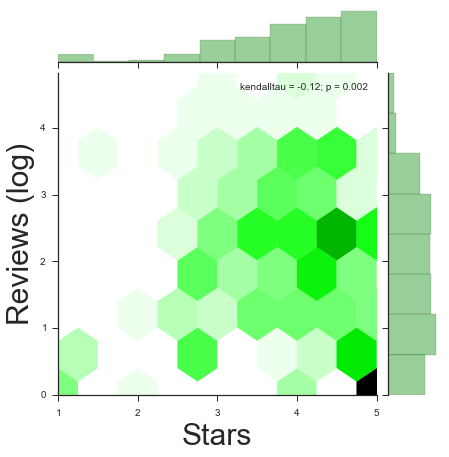

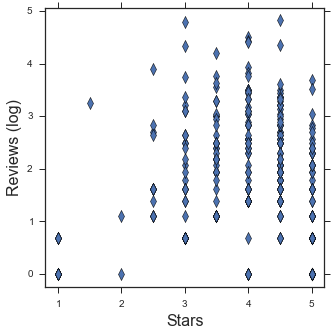

In [72]:
def main():
    data = call_mysql()
    df = np.array([])
    
    #ultimate solution mysql-> DF is probably this
    #df = pd.read_sql
    
    for d in data:
        #print(d)
        df = np.append(df, d, axis=0)
    rows = np.size(df)/2
    #print(rows)
    df = np.reshape(df,(rows,2))
    #print(df)
    
    seaborn_graph(df)
    scatterplot_graph(df)
    
if __name__=='__main__':
    main()